# Coursework 2: $\ell_1$-Methods for Sparse Recovery

[X] By tick the checkbox, we hereby declare that this coursework report is our own and autonomous work. We have acknowledged all material and sources used in its preparation, including books, articles, reports, lecture notes, internet software packages, and any other kind of document, electronic or personal communication. This work has not been submitted for any other assessment.

## 2.1 Subgradient Method

### 2.1.0 Differentiable Function

Let $f(\bm{x})$ be a differentiable function. We show that gradient descent direction leads a decrease of the objective function as follows.

The first order Taylor approximation of $f(\bm{x})$ is given by 
$$
    f(\bm{x} + \tau \bm{v}) 
    = f(\bm{x}) 
    + \langle \nabla f(\bm{x}), \tau \bm{v} \rangle 
    + O(\tau^2). 
$$
Take the negative gradient direction, i.e., $\bm{v} = -\nabla f(\bm{x})$. Then
$$
    f(\bm{x} - \tau \nabla f(\bm{x})) 
    = f(\bm{x}) 
    - \tau \| \nabla f(\bm{x}) \|^2_2
    + O(\tau^2). 
$$
It is clearly when $\tau>0$ is sufficiently small, 
$$
    f(\bm{x} -\tau \nabla f(\bm{x})) \le f(\bm{x}),
$$
which proves our claim. 

We study the non-differentiable case below. 

### 2.1.1 Descent Direction? (25%)

Let $\bm{x} \in \mathbb{R}^2$ and 
$$
    f(\bm{x}) = 3 |x_1| +  |x_2|.
$$
Consider the point $\bm{x}^0 = [0,1]^{\mathsf{T}}$. 
1. Show that $\bm{g} = [3,1]^{\mathsf{T}} \in \partial f(\bm{x})$. 
2. Let $\tau \in (0,1)$, find the closed form for 
$$
      f(\bm{x}^0 - \tau \bm{g} ).
$$
3. Comment on whether $-\bm{g}$ is a descent direction or not.

This exercise shows that sub-gradient linear search may not lead to a decrease of the objective function.

### 2.1.1 Solution
#### 1. Show that $\bm{g} = [3,1]^{\mathsf{T}} \in \partial f(\bm{x})$.
$$
    \bm{x} =[x_1,x_2], f(\bm{x}) = 3 |x_1| +  |x_2|.
$$
For a general absolute function of $x$: $g(x) = \alpha|x|$, the derivative of $g$ w.r.t. $x$ is:
$$
    \frac{dg(x)}{dx} = \alpha \frac{x}{|x|}, \forall x \neq 0.
$$
When $x>0$, $|x|=x$, $\frac{dg(x)}{dx} = \alpha$; when $x<0$, $|x|=-x$, $\frac{dg(x)}{dx} = -\alpha$; when $x=0$, by the defination of sub-gradient, $\frac{dg(x)}{dx} = [-\alpha,\alpha]$.  
For given function $f$ in the question, each axis $x_1 / x_2$ can be treated as a general absolute function, and $f(\bm{x})$ is not differentiable for $x_1=0$ or $x_2=0$. Similar to $g(x)$, we compute the partial derivative of $f(\bm{x})$ in different range of $\bm{x}$:
$$
    \frac{\partial f(\bm{x})}{\partial x_1} =
    \left\{  
        \begin{array}{lr}  
            -3     &      x_1<0,\\  
            [-3,3] &      x_1=0,\\  
            3      &      x_1>0.
        \end{array}
    \right.
$$
$$
    \frac{\partial f(\bm{x})}{\partial x_2} =
    \left\{  
        \begin{array}{lr}  
            -1     &      x_2<0,\\  
            [-1,1] &      x_2=0,\\  
            1      &      x_2>0.
        \end{array}
    \right.
$$
$\bm{g} = [3,1]^{\mathsf{T}}$ is a subgradient of $f(\bm{x})$ when $x_1=0, x_2>0$, also the derivative of $f(\bm{x})$ for $\forall \bm{x} >0$, thus $\bm{g} = [3,1]^{\mathsf{T}} \in \partial f(\bm{x})$.

#### 2. Let $\bm{x}^0 = [0,1]^{\mathsf{T}}, \tau \in (0,1)$, find the closed form for $f(\bm{x}^0 - \tau \bm{g} ).$  
Notice for $\bm{x}^0 = [0,1]^{\mathsf{T}} (x_1=0, x_2>0)$, according to the statement in the step $1$: $\bm{g} = [3,1]^{\mathsf{T}}$ is a subgradient of $\bm{x}^0$; $-\bm{g}$ is a subgradient linear search direction at $\bm{x}^0$; $f(\bm{x}^0 - \tau \bm{g})$ represents the new function value after one step of subgradient line search method.  
$$
    \bm{x}^0 - \tau \bm{g} = [0, 1] - [-3\tau, -\tau] = [-3\tau, 1-\tau]
$$
\begin{aligned}
    f(\bm{x}^0 - \tau \bm{g}) &= f(-3\tau, 1-\tau)\\
    &= 3 |-3\tau| +  |1-\tau|\\
    &= 9\tau + 1 - \tau,\ 0 < \tau < 1\\
    &= 9\tau + \tau - 1,\ \tau \geq 1
\end{aligned}
$$
    f(\bm{x}^0 - \tau \bm{g}) =
    \left\{  
        \begin{array}{lr}  
            8\tau + 1 & 0 < \tau < 1,\\  
            10\tau - 1 & \tau \geq 1.
        \end{array}
    \right.
$$

#### 3. Comment on whether $-\bm{g}$ is a descent direction or not.
When $\tau \in (0,1)$, 
$$
    f(\bm{x}^0 - \tau \bm{g}) = 8\tau + 1
$$
$$
    f(\bm{x}^0) = 3|x_1^{0}| + |x_2^0| = 1
$$
$$
    f(\bm{x}^0 - \tau \bm{g}) - f(\bm{x}^0) = 8\tau > 0
$$
Thus, $-\bm{g}$ is not a descent direction, which implies the sub-gradient linear search may not lead to a decrease of the objective function.

#### *Graphic approach for step 3*
Using the following code, it is easy to found that the point $\bm{x}^0 = [0,1]^{\mathsf{T}}$ is at the intersection of two planes; thus $-\bm{g}$ is not a descent direction.

#### <span style="color:green"> Reminder: Package `Plots` is required to run the code blocks below </span>

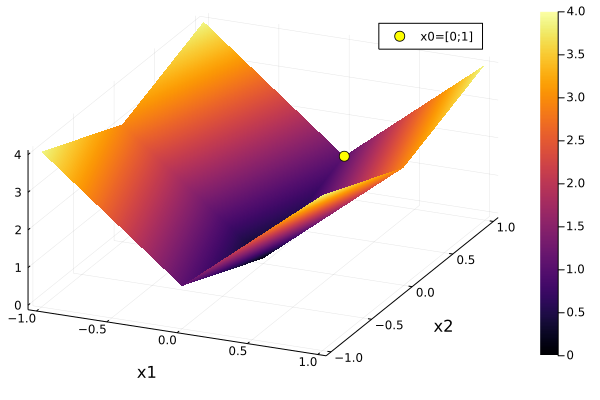

In [1]:
using Plots

x1 = -1:0.01:1
x2 = -1:0.01:1
f(x1, x2) = begin
    3*abs(x1) + abs(x2)
end
X = repeat(reshape(x1, 1, :), length(x2), 1)
Y = repeat(x2, 1, length(x1))
Z = map(f, X, Y)
surface(x1, x2, f, xlabel="x1", ylabel= "x2", camera=(30,60))
scatter!([0], [1], [1], label="x0=[0;1]", color="yellow", markersize = 6)

### 2.1.2 Wolfe's Example (25%) <a id="2.1.2"></a>

Let $\bm{x}\in \mathbb{R}^2$ and 
$$
    f(\bm{x}) = \begin{cases}
        5(9x_1^2 + 16 x_2^2)^{1/2} & \text{if}~ x_1 > |x_2|, \\
        9x_1 + 16|x_2| & \text{if}~ x_1 \le |x_2|.
    \end{cases}
$$
Suppose that $\bm{x}^0 = [16/9,1]^{\mathsf{T}}$. Consider exact line search where 
$$
   \bm{x}^{l+1} = \bm{x}^l - t^{l+1} \nabla f(\bm{x}^l),
$$
where 
$$
   t^{l+1} = \arg~ \min_t~ f(\bm{x}^l - t \nabla f(\bm{x}^l)).
$$
1. Draw the contours of $f(\bm{x})$ in the region $-2 \le x_1 \le 2$ and $-2 \le x_2 \le 2$. (The function `Plots > contour` may be useful.) **Solution click [here](#2.1.2.1)**.
2. Is the point $\bm{x} = [0,0]^{\mathsf{T}}$ the global optimal? Why? **Solution click [here](#2.1.2.2)**.
3. Find the closed form of $\nabla f(\bm{x})$ in the region where $x_1 > |x_2|$. **Solution click [here](#2.1.2.3)**.
4. Find $t^1$ and $\bm{x}^1$ numerically. Note that in the region where $x_1 > |x_2|$ **Solution click [here](#2.1.2.4)**.
   $$
    \left\langle 
      \nabla f \left(\bm{x}^{l+1}\right), \nabla f \left(\bm{x}^l\right)
    \right\rangle
    = \left\langle 
      \nabla f \left( \bm{x}^l - t \nabla f \left(\bm{x}^l\right) \right), \nabla f \left(\bm{x}^l\right)
    \right\rangle = 0. 
   $$
5. Similarly, find $t^2$ and $\bm{x}^2$, and $t^3$ and $\bm{x}^3$ numerically. **Solution click [here](#2.1.2.5)**.
6. (Challenging) Use mathematical induction, show that $\bm{x}^l \rightarrow [0,0]^{\mathsf{T}}$. **Solution click [here](#2.1.2.6)**.

Wolfe's example shows that sub-gradient method may not converge to a global optimal point. 

### 2.1.2 Solution
#### <a id="2.1.2.1"></a>1. Draw the contours of $f(\bm{x})$ in the region $-2 \le x_1 \le 2$ and $-2 \le x_2 \le 2$. 

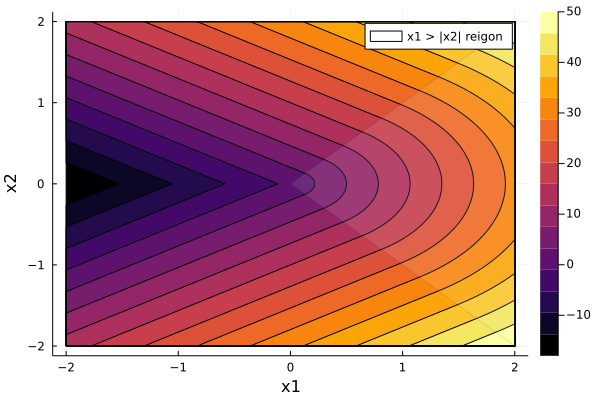

In [2]:
using Plots

x1 = -2:0.01:2
x2 = -2:0.01:2
f(x1, x2) = begin
    if x1 > abs(x2)
        5 * (9 * x1^2 + 16 * x2^2)^(1/2)
    else 
        9 * x1 + 16 * abs(x2)
    end
end
X = repeat(reshape(x1, 1, :), length(x2), 1)
Y = repeat(x2, 1, length(x1))
Z = map(f, X, Y)
plot(contour(x1, x2, f, fill = true), xlabel="x1", ylabel= "x2")

xs = [0, 2, 2, 0] # Vertices' x-component
ys = [0, 2, -2, 0]
plot!(Shape(xs, ys), label = "x1 > |x2| reigon", color = "white", opacity=.1)

#### 2. <a id="2.1.2.2"></a>Is the point $\bm{x} = [0,0]^{\mathsf{T}}$ the global optimal? Why?

The point $\bm{x} = [0,0]^{\mathsf{T}}$ is not the global optimal.  
When $ \bm{x} = [0,0]^T $, $x_1 = x_2 = 0$, $ f(\bm{x}) = 9x_1+16|x_2|$. 
$$\nabla f(\bm{x})=\frac{\partial f(\bm{x})}{\partial \bm{x}} = 
\left\{  
    \begin{array}{lr}  
        [9, -16]^{\mathsf{T}}      &      x_2<0,\\  
        [9, [-16,16]]^{\mathsf{T}} &      x_2=0,\\  
        [9, 16]^{\mathsf{T}}       &      x_2>0.
    \end{array}
\right.
$$

Hense, $ \nabla f(0, 0) = [9,[-16, 16]] $, the function descent at $[-1, 0]$ direction. For $ \forall x_1<0, x_2=0, f(x_1,x_2)<f(0,0)=0 $. E.g. $ f(-1,0)=-9<0 $.   
This conclution can be draw from the graph easily as well.


#### 3. <a id="2.1.2.3"></a>Find the closed form of $\nabla f(\bm{x})$ in the region where $x_1 > |x_2|$.
When $x_1 > |x_2|$, $ f(x) = 5(9x_1^2 + 16 x_2^2)^{1/2} $
$$ \nabla f_{x_1}(\bm{x}) = \frac{\partial f(\bm{x})}{\partial {x_1}} = \frac{5}{2}(9x_1^2 + 16 x_2^2)^{-1/2}\times18x_1 = 45x_1(9x_1^2 + 16 x_2^2)^{-1/2} $$
$$ \nabla f_{x_2}(\bm{x}) = \frac{\partial f(\bm{x})}{\partial {x_2}} = \frac{5}{2}(9x_1^2 + 16 x_2^2)^{-1/2}\times32x_2 = 80x_2(9x_1^2 + 16 x_2^2)^{-1/2} $$
Hence, the closed form of $\nabla f(x)$
$$ \nabla f(\bm{x}) = [\nabla f_{x_1}(\bm{x}),\nabla f_{x_2}(\bm{x})]^T = [45x_1(9x_1^2 + 16 x_2^2)^{-1/2},80x_2(9x_1^2 + 16 x_2^2)^{-1/2}]^T $$

#### 4. <a id="2.1.2.4"></a>Find $t^1$ and $\bm{x}^1$ numerically. 
Since $ \bm{x}^0 = [\frac{16}{9},1] $, $x_1>|x_2|$, $ f(\bm{x}) = 5(9x_1^2 + 16 x_2^2)^{1/2} $, $ \nabla f(\bm{x}) = [45x_1(9x_1^2 + 16 x_2^2)^{-1/2},80x_2(9x_1^2 + 16 x_2^2)^{-1/2}]^T $
$$ \nabla f(\bm{x}^0) = \nabla f(\frac{16}{9},1) = [12, 12]^T $$
$$ \bm{x}^1 = \bm{x}^0 - t\nabla f(\bm{x}^0) $$
$$ f(\bm{x}^1) = f(\frac{16}{9}-12t,1-12t) $$

* If $ 1-12t \geq 0, t \leq \frac{1}{12} $:
    $$ \frac{16}{9}-12t - |1-12t| = \frac{16}{9}-12t - 1 + 12t = \frac{7}{9} $$
    $ x_1>|x_2| $ is always true.
    
* If $ 1-12t < 0, t > \frac{1}{12} $:
    $$ x_1 > |x_2| $$ 
    $$ \frac{16}{9}-12t > |1-12t| $$
    $$ \frac{16}{9}-12t > 12t-1 $$ 
    $$ t < \frac{25}{216} $$
    $ x_1>|x_2| $ is true for $\frac{1}{12} < t < \frac{25}{216}$  
    
Therefore,
$$
    f(\bm{x}^1) = \begin{cases}
        5(9x_1^2 + 16 x_2^2)^{1/2} & \text{if}~ t < \frac{25}{216}, \\
        9x_1 + 16|x_2| & \text{if}~ t \geq \frac{25}{216}.
    \end{cases}
$$
let $ x_1 = \frac{16}{9}-12t $ and $ x_2 = 1-12t $
$$
    f(t) = \begin{cases}
        5(3600t^2 - 768t + \frac{400}{9})^{1/2} & \text{if}~ t < \frac{25}{216}, \\
        84t & \text{if}~ t \geq \frac{25}{216}.
    \end{cases}
$$
For any second-order function $f(x)=ax^2+bx+c\ (a>0)$, $\Delta f(x)=2ax+b$, when $x=-\frac{b}{2a}$, &$\Delta f(x)=0$, it reaches its minimum value.

* If $ t < \frac{25}{216} $, when $ t = -\frac{b}{2a} = -\frac{-768}{2\times3600} = \frac{8}{75} $,
    $$ f(t^0)_{min} = \frac{28}{3} $$
* If $ t \geq \frac{25}{216} $, when $ t = \frac{25}{216} $,
    $$ f(t^0)_{min} = \frac{175}{18} > \frac{28}{3} $$  
    
Hence,
$$ t^1 = \arg~ \min_t~ f(\bm{x}^0 - t \nabla f(\bm{x}^0)) = \frac{8}{75} $$
$$ \bm{x}^1 = \bm{x}^0 - t^1 \nabla f(\bm{x}^0) = [\frac{16}{9}-12t,1-12t]^T\big|_{t = \frac{8}{75}} = [\frac{112}{225},-\frac{7}{25}]^T $$

#### <a id="2.1.2.5"></a>5. Similarly, find $t^2$ and $\bm{x}^2$, and $t^3$ and $\bm{x}^3$ numerically.
(1) $x^2$ and $t^2$  
since $\bm{x}^1 = [\frac{112}{225},-\frac{7}{25}]^T$, $x_1>|x_2|$, $ f(\bm{x}) = 5(9x_1^2 + 16 x_2^2)^{1/2} $, $ \nabla f(\bm{x}) = [45x_1(9x_1^2 + 16 x_2^2)^{-1/2},80x_2(9x_1^2 + 16 x_2^2)^{-1/2}]^T $
$$ \nabla f(\bm{x}^1) = [12, -12]^T $$
$$ \bm{x}^2 = \bm{x}^1 - t \nabla f(\bm{x}^1)$$
$$ f(\bm{x}^2) = f(\frac{112}{225}-12t,-\frac{7}{25}+12t) $$
$$
    f(\bm{x}^2) = \begin{cases}
        5(9x_1^2 + 16 x_2^2)^{1/2} & \text{if}~ t < \frac{7}{216}, \\
        9x_1 + 16|x_2| & \text{if}~ t \geq \frac{7}{216}.
    \end{cases}
$$
let $ x_1 = \frac{112}{225}-12t $ and $ x_2 = \frac{7}{25}+12t $
$$
    f(t) = \begin{cases}
        5(3600t^2 - \frac{5376}{25}t + \frac{784}{225})^{1/2} & \text{if}~ t < \frac{7}{216}, \\
        84t & \text{if}~ t \geq \frac{7}{216}.
    \end{cases}
$$
* If $ t < \frac{7}{216} $, when $ t = -\frac{b}{2a} = -\frac{-5376/25}{2\times3600} = \frac{56}{1875} $, 
$$ f(t^1)_{min} = \frac{196}{75} $$
* If $ t \geq \frac{7}{216} $, when $ t = \frac{7}{216} $,
$$ f(t^1)_{min} = \frac{49}{18} > \frac{196}{75} $$  

Hence,
$$ t^2 = \arg~ \min_t~ f(x^1 - t \nabla f(x^1)) = \frac{56}{1875} $$
$$ \bm{x}^2 = \bm{x}^1 - t^2 \nabla f(\bm{x}^1) = [\frac{112}{225}-12t,\frac{7}{25}+12t]^T\big|_{t=\frac{56}{1875}} = [\frac{784}{5625},\frac{49}{625}]^T $$

(2) $x^3$ and $t^3$  
since $\bm{x}^2 = [\frac{784}{5625},\frac{49}{625}]^T $, $x_1>|x_2|$, $ f(x) = 5(9x_1^2 + 16 x_2^2)^{1/2} $, $ \nabla f(x) = [45x_1(9x_1^2 + 16 x_2^2)^{-1/2},80x_2(9x_1^2 + 16 x_2^2)^{-1/2}]^T $
$$ \nabla f(x^1) = [12, 12]^T $$
$$ \bm{x}^3 = \bm{x}^2 - t \nabla f(\bm{x}^2)$$
$$ f(\bm{x}^3) = f(\frac{784}{5625}-12t,\frac{49}{625}-12t) $$
$$
    f(\bm{x}^3) = \begin{cases}
        5(9x_1^2 + 16 x_2^2)^{1/2} & \text{if}~ t < \frac{7}{216}, \\
        9x_1 + 16|x_2| & \text{if}~ t \geq \frac{7}{216}.
    \end{cases}
$$
let $ x_1 = \frac{112}{225}-12t $ and $ x_2 = \frac{7}{25}+12t $
$$
    f(t) = \begin{cases}
        5(3600t^2 - \frac{5376}{25}t + \frac{784}{225})^{1/2} & \text{if}~ t < \frac{49}{5400}, \\
        84t & \text{if}~ t \geq \frac{49}{5400}.
    \end{cases}
$$
* If $ t < \frac{49}{5400} $, when $ t = -\frac{b}{2a} = -\frac{-37632/625}{2\times3600} = \frac{392}{46875} $, 
    $$ f(t^1)_{min} = \frac{671}{917} $$
* If $ t \geq \frac{49}{5400} $, when $ t = \frac{49}{5400} $,
    $$ f(t^1)_{min} = \frac{343}{450} > \frac{671}{917} $$  

Hence,
$$ t^3 = \arg~ \min_t~ f(x^2 - t \nabla f(x^2)) = \frac{392}{46875} $$
$$ \bm{x}^3 = \bm{x}^2 - t^3 \nabla f(\bm{x}^2) = [\frac{784}{5625}-12t,\frac{49}{625}+12t]^T\big|_{t=\frac{392}{46875}} = [\frac{5488}{140625},-\frac{343}{15625}]^T $$

#### <a id="2.1.2.6"></a>6. Use mathematical induction, show that $\bm{x}^l \rightarrow [0,0]^{\mathsf{T}}$. 
$$ t^1  = \frac{8}{75} $$
$$ t^2  = \frac{56}{1875} $$
$$ t^3  = \frac{392}{46875} $$
$$ x^1  = [\frac{112}{225},-\frac{7}{25}]^T $$
$$ x^2  = [\frac{784}{5625},\frac{49}{625}]^T $$
$$ x^3  = [\frac{5488}{140625},-\frac{343}{15625}]^T $$

Through mathematical induction, it could be found that
$$ t^l = \frac{8}{21}(\frac{7}{25})^l $$
$$ x^l = [\frac{16}{9}(\frac{7}{25})^l,(-\frac{7}{25})^l]^T $$
Therefore, when $l \rightarrow \infty $, $\bm{x}^l \rightarrow [0,0]^T$

As disscussed in step 2, $ x = [0,0]^T $ is not the global optimal, it concludes that sub-gradient line search method may not converge to a global optimal point. 

Back to [question 2.1.2](#2.1.2).

## 2.2 Sparse Recovery: Lasso <a id="2.2"></a>

### ISTA Implementation and Test (50%)

Implement ISTA algorithm as a function `rec_ista` to solve the Lasso problem
$$
    \frac{1}{2} \| y- Ax \|_2^2 + \lambda \| x \|_1.
$$
where $\lambda > 0$ is the regularization constant. 

Make sure that the regularization constant $\lambda$ and the stepsize $\tau$ are among input parameters.

Suggested parameter for testing: $m=32,~ n=64,~ S=8$. Noise variance can be set small $\sigma^2 = 1e-2 \text{ or } 1e-4$.

1. For a given regularization parameter $\lambda > 0$, try different values of the step size $\tau$, some small compared to $2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$ and some larger than it, for example, $20/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$. Discuss the convergence of ISTA when $\tau$ varies. **Solution click [here](#2.2.1)**.
2. With proper $\tau$ so that ISTA converges, use numerical simulations to discuss how to choose an appropriate $\lambda$ to get reasonable recovery $\hat{x}$. **Solution click [here](#2.2.2)**.
3. Numerically compare ISTA and SP algorithms for noiseless sparse recovery problem ($\sigma^2 = 0$). Discuss your observations. **Solution click [here](#2.2.3)**.

### Solution 2.2
#### 1. For a given regularization parameter $\lambda > 0$, try different values of the step size $\tau$, some small compared to $2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$ and some larger than it, for example, $20/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$. Discuss the convergence of ISTA when $\tau$ varies. <a id="2.2.1"></a>

During the following part, we first generate a [sparse_data_gen](#data) function to formulate the data required, which takes the data dimension $(m, n)$, sparsity level $S$, noise variant $\sigma^2$, and return a original sparse $\bm{x}$, known column-normalized matrix $\bm{A}$, target $\bm{y}$, and sparse index $T$.  

Then we build a [soft-thresholding function](#soft_thresholding). It takes the target $\bm{y}$ and the threshold $\gamma$. The output $x$ is the optimal solution for $\mathcal{l}_1$-norm proximal operator.

Finally, we construct the [ISTA method](#ISTA). This method iteratively search the best solution for the objective function. It takes the known column-normalized matrix $\bm{A}$ and target $\bm{y}$ from the data generator; the regularization constant $\lambda$ and the stepsize $\tau$ that define by the user; and output the final solution $\hat{\bm{x}}$ after certain number of iterations / when the difference between two iterations is small enough. In each itration $l$, ISTA utilizes the soft-thresholding function to find the intermediate solution $\hat{\bm{x}}^{l}$.

For test, see [here](#test1); and for comments, see [here](#test2).

#### <a id="data"></a>Sparse Data Generating Function

#### <span style="color:green"> Reminder: Package `Distributions`, `LinearAlgebra`, `Plots` and `Random` are required to run the code blocks below </span>

In [3]:
using Distributions
using LinearAlgebra
using Random

function sparse_data_gen(m, n, S, σ)
    A = randn(Float64,m,n);
    for i = 1:n
        A[:,i] = normalize(A[:, i]);
    end
    T = sample(1:n,S,replace = false);
    x = zeros(n,1);
    for i = 1:S
        x[T[i]] = randn(Float64);
    end
    w = rand(Normal(0, σ^2),m,1);
    y = A*x+w;
    return  y, A, x, T
end

sparse_data_gen (generic function with 1 method)

#### <a id="soft_thresholding"></a>Soft Thresholding Function 

In [4]:
function soft_thresholding(x, γ)
  for m = 1:size(x, 1)
      y = x[m]
      if y >= γ
          x[m] = y - γ
      elseif y <= -γ
          x[m] = y + γ
      else
          x[m] = 0
      end
  end
  return x
end

soft_thresholding (generic function with 1 method)

#### <a id="ISTA"></a> ISTA method

In [5]:
function rec_ista(A, y, λ, τ)
  # columns_A stands for the number of colums in A
  columns_A = size(A, 2)
  # initialise the objective vector to a n*1 zero vector
  x_l =  zeros(columns_A, 1)
  # initialize the iteration index
  interation_time = 0    

  while true
    # x_l stands for the objective vector from the last iteration
    # define the surrogate_target_vector (n*1)
    surrogate_target_vector = x_l + τ * A' * (y - A * x_l) 
    # define the threshold (regularization constant λ * step size τ)
    thresholding_value = λ * τ
    
    # x_new stands for the objective vector obtained in this iteration
    x_new = soft_thresholding(surrogate_target_vector[:,1], thresholding_value) 
    # set the stopping criteria
    ∇fx = -A' * (y - A * x_new)
    for i = 1:size(A, 2)
      if x_new[i] > 0
        ∇fx[i] = ∇fx[i] + λ
      elseif x_new[i] < 0
        ∇fx[i] = ∇fx[i] - λ
      else 
        ∇fx[i] = soft_thresholding([∇fx[i]], λ)[1]
      end
    end
    if (norm(∇fx)< 1e-6) || (interation_time >= 50000)
      # if the derivative of the objective functin is small enough, 
      # or it has run 10000 times, regard as the global minimum has been found
      return interation_time, x_new  
    end

    # update the objective vector and iteration index for next iteration
    x_l = x_new 
    interation_time += 1
  end
end

rec_ista (generic function with 1 method)

#### <a id="test1"></a> Test and comment 

To investigate the effect of step size, we initialize:
* the size of matrix $\bm{A}$ is $32 \times 64$, 
* the original sparsity $S$ of $\bm{x}$ is $8$, 
* the noise variance $\sigma^2 = 1e-2$,
* regularization constant $λ = 1e-3$.

$\tau$ is set to two regions: 
* from $0$ to $2/\sigma_{max}(\bm{A}^{T}\bm{A})$,
* from $4/\sigma_{max}(\bm{A}^{T}\bm{A})$ to $20/\sigma_{max}(\bm{A}^{T}\bm{A})$

For both resgions, the value of $\tau$, the error between the original $\bm{x}$ and $\hat{\bm{x}}$ find by ISTA (Norm difference: $\|\hat{\bm{x}}-\bm{x}\|_2 / \|\bm{x}\|$), and itration times are printed. And the error w.r.t. iterations is ploted.

#### Calculate $\sigma_{\max}$

In [6]:
using Distributions
using LinearAlgebra
using Random
Random.seed!(3);

m = 32
n = 64
S = 8
σ = 1e-2

# A is an m by n matrix, x is a n by 1 vector, y is an m by 1 vector
y, A, x, T = sparse_data_gen(m, n, S, σ)

# set regularization constant λ, λ > 0
λ = 1e-3

# set stepsize, in pratice, the step sie is fixed as 0 < τ < (2/σ_AtA_max)
_, σ_AtA, _ = svd(A' * A) 
# the second element returned from svd function is sigular values, sorted in descending order
σ_AtA_max = σ_AtA[1]

test_ista_vector = zeros(n, 1)
rounds = Vector{Float64}()
norm_diff = Vector{Float64}()

Float64[]

#### τ in small region ($τ \leq 2/\sigma_{\max}$)

In [7]:
println("=" ^ 100)
println("τ in small region")
println("=" ^ 100)
for τ_numerator in 0.1:0.1:2
    
    τ = τ_numerator / σ_AtA_max
    print("τ_numerator = ", τ_numerator, "     ") 
    println("τ = ",τ)

    times, test_ista_vector = rec_ista(A, y, λ, τ)
    error = norm(test_ista_vector - x)/norm(x)
    println("norm difference = ", error, " iteration times: ", times)
    #println("recovered_x = ", test_ista_vector)
    println("-" ^ 60)
    
    append!(rounds, times)
    append!(norm_diff,  error)
end

τ in small region
τ_numerator = 0.1     τ = 0.019973619074676624


norm difference = 0.2639297769935529 iteration times: 50000
------------------------------------------------------------
τ_numerator = 

0.2     τ = 0.03994723814935325
norm difference = 

0.08028847723367284 iteration times: 50000
------------------------------------------------------------
τ_numerator = 0.3     τ = 0.059920857224029865


norm difference = 0.004736859025714521 iteration times: 42813
------------------------------------------------------------
τ_numerator = 0.4     τ = 0.0798944762987065
norm difference = 

0.00473685350359478 iteration times: 32109
------------------------------------------------------------
τ_numerator = 0.5     τ = 0.0998680953733831


norm difference = 0.00473683889386649 iteration times: 25687
------------------------------------------------------------
τ_numerator = 0.6     τ = 0.11984171444805973
norm difference = 

0.004736857845733928 iteration times: 21405
------------------------------------------------------------
τ_numerator = 0.7     τ = 0.13981533352273634


norm difference = 0.0047368356559206876 iteration times: 18347
------------------------------------------------------------
τ_numerator = 0.8     τ = 0.159788952597413
norm difference = 

0.004736850155543122 iteration times: 16053
------------------------------------------------------------
τ_numerator = 0.9     τ = 0.1797625716720896


norm difference = 0.004736856944273337 iteration times: 14269
------------------------------------------------------------
τ_numerator = 1.0     τ = 0.1997361907467662
norm difference = 

0.00473681715736271 iteration times: 12842
------------------------------------------------------------
τ_numerator = 1.1     τ = 0.21970980982144286


norm difference = 0.004736844523252864 iteration times: 11674
------------------------------------------------------------
τ_numerator = 1.2     τ = 0.23968342889611946
norm difference = 

0.004736835763970131 iteration times: 10701
------------------------------------------------------------
τ_numerator = 1.3     τ = 0.2596570479707961


norm difference = 0.004736846246717051 iteration times: 9878
------------------------------------------------------------
τ_numerator = 1.4     τ = 0.2796306670454727
norm difference = 

0.004736844972320428 iteration times: 9172
------------------------------------------------------------
τ_numerator = 1.5     τ = 0.29960428612014933


norm difference = 0.004736860562394509 iteration times: 8561
------------------------------------------------------------
τ_numerator = 1.6     τ = 0.319577905194826
norm difference = 

0.004736833457591526 iteration times: 8026
------------------------------------------------------------
τ_numerator = 1.7     τ = 0.3395515242695026


norm difference = 0.00473678075347944 iteration times: 7554
------------------------------------------------------------
τ_numerator = 1.8     τ = 0.3595251433441792
norm difference = 

0.004736839144223711 iteration times: 7134
------------------------------------------------------------
τ_numerator = 1.9     τ = 0.3794987624188558


norm difference = 0.0047367739258999415 iteration times: 6759
------------------------------------------------------------
τ_numerator = 2.0     τ = 0.3994723814935324
norm difference = 0.004736752019879771 iteration times: 6393
------------------------------------------------------------


#### τ in large region ($τ > 2/\sigma_{\max}$)

In [8]:
println("=" ^ 100)
println("τ in large region")
println("=" ^ 100)
for τ_numerator in 4:2:20

    τ = τ_numerator / σ_AtA_max
    print("τ_numerator = ", τ_numerator, "     ") 
    println("τ = ",τ)

    times, test_ista_vector = rec_ista(A, y, λ, τ)
    error = norm(test_ista_vector - x)/norm(x)
    println("error = ", error, " iteration times: ", times)
    #println("recovered_x = ", test_ista_vector)
    println("-" ^ 60)
    
    append!(rounds, times)
    append!(norm_diff,  error)
end

τ in large region
τ_numerator = 4     τ = 0.7989447629870648


error = 2.612852363696492e12 iteration times: 50000
------------------------------------------------------------
τ_numerator = 6     τ = 1.1984171444805973
error = 

7.526809334732224e189 iteration times: 50000
------------------------------------------------------------
τ_numerator = 8     τ = 1.5978895259741297


error = 1.8691520866258696e74 iteration times: 50000
------------------------------------------------------------
τ_numerator = 10     τ = 1.997361907467662
error = 

2.6846870287250387e262 iteration times: 50000
------------------------------------------------------------
τ_numerator = 12     τ = 2.3968342889611947


error = 6.09920926200901e243 iteration times: 50000
------------------------------------------------------------
τ_numerator = 14     τ = 2.7963066704547273
error = 

7.845449706083104e65 iteration times: 50000
------------------------------------------------------------
τ_numerator = 16     τ = 3.1957790519482594


error = 3.528659174288959e122 iteration times: 50000
------------------------------------------------------------
τ_numerator = 18     τ = 3.595251433441792
error = 

8.508745117489177e195 iteration times: 50000
------------------------------------------------------------
τ_numerator = 20     τ = 3.994723814935324


error = 8.057792385546477e236 iteration times: 50000
------------------------------------------------------------


#### <a id="test2"></a> Plot figures of Error (norm difference) against τ 
<span style="color:green"> Reminder: Please make sure the code blocks above are all executed before run the code below </span>

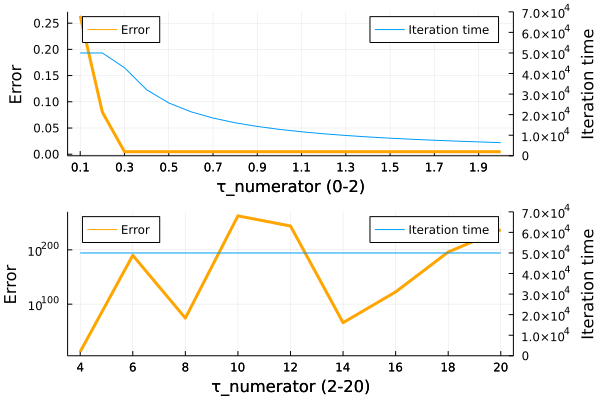

In [9]:
using Plots

p1 = plot(0.1:0.1:2, norm_diff[1:20], label = "Error", color=:orange, ylabel = "Error", legend=:topleft, lw = 3, xticks = 0.1:0.2:2);
p1 = plot!(twinx(), 0.1:0.1:2, rounds[1:20], ylims = (0,70000), label = "Iteration time", ylabel = "Iteration time", xticks = 0.1:0.2:2);
xlabel!("τ_numerator (0-2)");

p2 = plot(4:2:20, norm_diff[21:end], label = "Error", color=:orange, ylabel = "Error", legend=:topleft, lw = 3, xticks = 4:2:20, yaxis=:log);
p2 = plot!(twinx(), 4:2:20, rounds[21:end], ylims = (0,70000), label = "Iteration time", ylabel = "Iteration time", xticks = 4:2:20);
xlabel!("τ_numerator (2-20)");

plot(p1, p2, layout = (2, 1), right_margin = 20Plots.mm)

#### Comments

It can be seen from above results, for a given $\lambda > 0$, different values of the step size $\tau$ will affect the convergence of ISTA. 
* When the step size is too small, the algorithm takes a long time to converge. In our case, when $τ = 0.04$ ($0.2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$), ISTA still could not reach the minimal point within $50000$ iterations. (However, it will converge if we set stopping interation number even higher.)
* When $\tau$ is in the region of $ [0.06, 2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})]$, ISTA converges within $50000$ iterations. The converge time and the error (norm difference between original vector and recovered vector $\|\hat{x}-x\|_2 / \|x\|$) get smaller when the $\tau$ increase. 
* When $\tau$ is exactly $2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$, the iteration time ($6305$) needed, and the error ($0.0047745$) is the smallest.
* When $\tau$ is larger than $2/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$, the error fluctuate no matter how many iterations there are. This means ISTA will not converge with $\tau$ in this region.

Back to [question 2.2](#2.2).

#### 2. With proper $\tau$ so that ISTA converges, use numerical simulations to discuss how to choose an appropriate $\lambda$ to get reasonable recovery $\hat{x}$. <a id="2.2.2"></a>

In this section, we fixed $\tau$ to be $1.5/\sigma_{\max}(\bm{A}^{\mathsf{T}}\bm{A})$ as a proper value. $\lambda$ is evaluated from $0$ to $0.1$

In [10]:
using Random, Distributions
using LinearAlgebra
Random.seed!(1);

m = 32
n = 64
S = 8
σ = 1e-2

# A is an m by n matrix, x is a n by 1 vector, y is an m by 1 vector
y, A, x, T = sparse_data_gen(m, n, S, σ);

# set stepsize, in pratice, the step sie is fixed as 0 < τ < (2/σ_AtA_max)
# the second element returned from svd function is sigular values, sorted in descending order
_, σ_AtA, _ = svd(A' * A) 
σ_AtA_max = σ_AtA[1]
τ = 1.5 / σ_AtA_max 
println("τ = ",τ)

test_ista_vector = zeros(n, 1)
rounds = Vector{Float64}()
norm_diff = Vector{Float64}()
sparsity = Vector{Int64}()

for λ in 0:1e-3:1e-1
    times, test_ista_vector = rec_ista(A, y, λ, τ)
    T = norm(test_ista_vector, 0)
    append!(rounds, times)
    append!(norm_diff,  norm(test_ista_vector-x)/norm(x))
    append!(sparsity, T)

    if λ <= 1e-2
        println("-" ^ 100)
        println("λ = ", λ)
        println("norm difference = ", norm(test_ista_vector-x)/norm(x), " iteration times: ", times)
        println("sparsity (number of nonzeros in x) = ", T)
        #println("recovered_x = ", test_ista_vector)
    end
end

τ = 0.29321429590627474
----------------------------------------------------------------------------------------------------
λ = 0.0
norm difference = 0.6881038351823798 iteration times: 176
sparsity (number of nonzeros in x) = 64.0


----------------------------------------------------------------------------------------------------
λ = 0.001
norm difference = 0.0014633666843658216 iteration times: 4453
sparsity (number of nonzeros in x) = 12.0
----------------------------------------------------------------------------------------------------
λ = 0.002
norm difference = 0.0028956000287567794 iteration times: 2321
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.003
norm difference = 0.004328663872553036 iteration times: 1609
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.004
norm difference = 0.0057618821672881584 iteration times: 1252
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.005
norm difference = 0.0071950896


λ = 0.006
norm difference = 0.008628292847314117 iteration times: 893
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.007
norm difference = 0.01006156044781915 iteration times: 789
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.008
norm difference = 0.011494789649092776 iteration times: 711
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.009
norm difference = 0.012928021451269834 iteration times: 650
sparsity (number of nonzeros in x) = 11.0
----------------------------------------------------------------------------------------------------
λ = 0.01
norm difference = 0.014361251332951833 iteration times: 601
sparsity (number of nonzeros in x) = 11.0


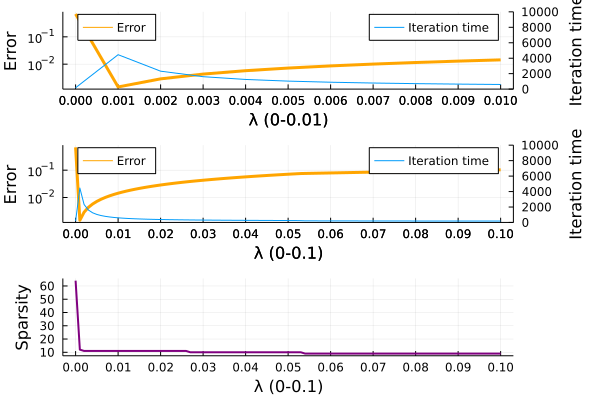

In [11]:
using Plots

p3 = plot(0:1e-3:1e-2, norm_diff[1:11], label = "Error", ylabel="Error", color="orange", legend=:topleft, lw = 3, xticks = 0:1e-3:1e-2, yaxis=:log);
p3 = plot!(twinx(), 0:1e-3:1e-2, rounds[1:11], label = "Iteration time", ylabel = "Iteration time", ylims=(0,10000), xticks = 0:1e-3:1e-2);
xlabel!("λ (0-0.01)")

p4 = plot(0:1e-3:1e-1, norm_diff, label = "Error", ylabel="Error", color="orange", legend=:topleft, lw = 3, xticks = 0:1e-2:1e-1, yaxis=:log);
p4 = plot!(twinx(), 0:1e-3:1e-1, rounds, label = "Iteration time", ylabel = "Iteration time", ylims=(0,10000), xticks = 0:1e-2:1e-1);
xlabel!("λ (0-0.1)")

p5 = plot(0:1e-3:1e-1, sparsity, label = "", ylabel="Sparsity", color="purple", lw = 2, xticks = 0:1e-2:1e-1);
xlabel!("λ (0-0.1)")

plot(p3, p4, p5, layout = (3, 1), right_margin = 20Plots.mm)

#### Comments

It could be observed from the figure that the error between recovered signal and target signal ($\|\hat{\bm{x}}-\bm{x}\|_2 / \|\bm{x}\|$) has the minimum value (in our case, $1.46\times10^{-3}$) when $\lambda$ is around $0.001$ and the iteration cycles required is around $4400$.

Moreover, $\lambda$ is a regularization parameter which effect the sparsity of the output $\bm{x}$.
* When $\lambda$ is small, the LSE will dominant the objective function, thus $\bm{x}$ will not be very sparse (large number of nonzeros).
* When $\lambda$ is large, there will be a strong panelize on the sparsity of $\bm{x}$, hence there will be more zeros in $\bm{x}$ to make $\|\bm{x}\|_1$ small enough. This property can address the overfitting problem well.

This phenomenon can be observed in the third graph. 

Back to [question 2.2](#2.2).

#### 3. Numerically compare ISTA and SP algorithms for noiseless sparse recovery problem ($\sigma^2 = 0$). Discuss your observations.<a id="2.2.3"></a>

The SP algorithm is defined below:

In [12]:
using Distributions
using LinearAlgebra
using Random

function sparse_data_gen(m, n, S, σ)
    A = randn(Float64,m,n);
    for i = 1:n
        A[:,i] = normalize(A[:, i]);
    end
    T = sample(1:n,S,replace = false); 
    x = zeros(n,1);
    for i = 1:S
        x[T[i]] = randn(Float64);
    end
    w = rand(Normal(0, σ^2),m,1);
    y = A*x+w;
    return  y, A, x, T
end

function SP(S, A, y)
    n = size(A,2);
    I = sortperm(abs.(A'*y)[:], rev=true);
    Sp = I[1:S];
    As = A[:,Sp];
    yp = As*(As\y);
    yr = y-yp;
    x = zeros(n,1);
    error = 1;
    count = 0;
    while error > 1e-6 && count < 100
        I = sortperm(abs.(A'*yr)[:], rev=true);
        Sp = [Sp; I[1:S]];
        As = A[:,Sp];
        b = zeros(n,1);
        bs = As\y;
        for j = 1:length(bs)
            b[Sp[j]] = bs[j];
        end
        I = sortperm(abs.(b)[:], rev=true);
        Sp = I[1:S];
        As = A[:,Sp];
        x = zeros(n,1);
        xs = As\y;
        for j = 1:length(xs)
           x[Sp[j]] = xs[j];
        end
        yr = y-A*x;
        error = norm(yr)/norm(y);
        count = count+1;
    end
    return x
end

SP (generic function with 1 method)


#### <span style="color:green"> Reminder: Package `JLD2` is required to run the code block below.</span>
#### <span style="color:green"> Please make sure the code blocks above are all executed before run the code below if change `allow_run` to `true`, it takes around 1 minutes to run the code with 10 simulations.</span>

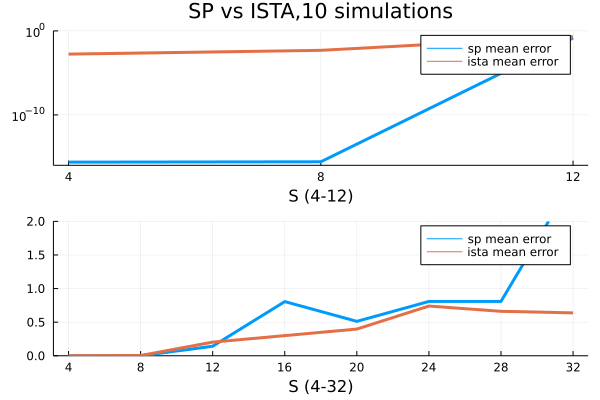

In [13]:
using Distributions
using LinearAlgebra
using Random
using Statistics
using Plots
using JLD2

allow_run = false;

if allow_run
    Random.seed!(3);
    sp = Vector{Float64}()
    ista = Vector{Float64}()
    simulation = 10
    println("simulation: ", simulation, " times")

    for s = 4:4:32
        sp_error = zeros(simulation,1)
        ista_error = zeros(simulation,1)
        for N in 1:simulation
            y,A,x,T = sparse_data_gen(32,64,s,0)
            x_sp = SP(s,A,y)
            sp_norm = norm(x-x_sp)/norm(x);
            _, σ_AtA, _ = svd(A' * A) # the second element returned from svd function is sigular values, sorted in descending order
            τ = 1.5 / σ_AtA[1] # largest sigular values
            _, x_ista = rec_ista(A, y, 0.001, τ);
            ista_norm = norm(x-x_ista)/norm(x);
            sp_error[N] =  sp_norm;
            ista_error[N] = ista_norm;
        end
        sp_mean = mean(sp_error); # take the average value of 10 simulations
        ista_mean = mean(ista_error);
        append!(sp, sp_mean);
        append!(ista, ista_mean);
        println("s = ", s, "    sp mean error = ", sp_mean, "    ista mean error = ", ista_mean)
    end

    p5 = plot(4:4:12, sp[1:3], label = "sp mean error", title = string("SP vs ISTA,",simulation," simulations"), xlabel = "S (4-12)", lw = 3, xticks = 4:4:12, ylims = (1e-16,1), yaxis=:log)
    p5 = plot!(4:4:12, ista[1:3], label = "ista mean error", lw = 3)

    p6 = plot(4:4:32, sp, label = "sp mean error", xlabel = "S (4-32)", lw = 3, xticks = 4:4:32, ylims = (0,2))
    p6 = plot!(4:4:32, ista, label = "ista mean error", lw = 3)

    p = plot(p5, p6, layout = (2, 1))
    @save "sp_ista.jld2" p
else 
    @load "sp_ista.jld2" p
end
display(p)

#### Comments
In order to compare the performance of SP and ISTA algorithm, S was varied from 4 to 32, with a step of 4. There were 10 simulations for each S value, the error (norm difference) $\|\hat{x}-x\|_2 / \|x\|$ was recorded for each simulation, the average values of the 10 simulations were taken to plot the figure above.

From above figure we can see that, when number of the non-zero elements S is less than 12, subspace pursuit algorithm has better performance than ISTA, since the norm difference between recovered signal and real signal of SP is lower than ISTA. When non-zero elements S is larger than 12, the error of SP raised drastically while the performance of ISTA is stable.

Back to [question 2.2](#2.2).

## Highlight

1. We give a detailed explaination for question 2.1.1 and 2.1.2 with plots.
2. We proof step 6 in 2.1.2.
3. We clearly illustrate our idea to construct ISTA and the effect of $\lambda$ and $\tau$ with graphs and plots.
4. We compare the difference between ISTA and SP.
